# Linear Regression Training Project Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
data = pd.read_csv("advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


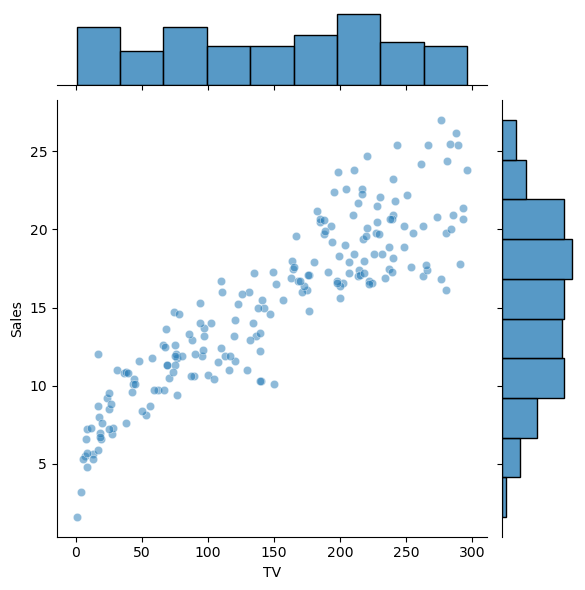

In [9]:
#Spend on tv and sales relationship
sns.jointplot(x='TV',y='Sales',data=data,alpha=0.5)

In [10]:
data['TV'].corr(data['Sales'])

0.9012079133023306

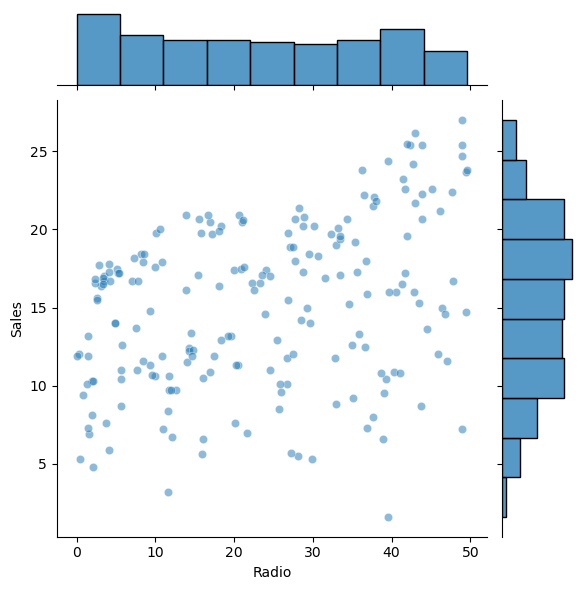

In [12]:
#spend on Radion vs sales
sns.jointplot(x='Radio',y='Sales',data=data,alpha=0.5)

In [13]:
data['Radio'].corr(data['Sales'])

0.3496310970076693

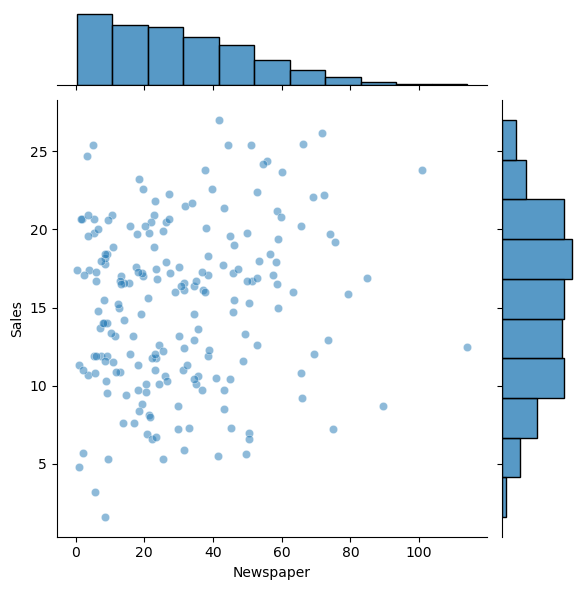

In [14]:
#Spend on Newspaper vs Sales
sns.jointplot(x='Newspaper',y='Sales',data=data,alpha=0.5)

In [16]:
data['Newspaper'].corr(data['Sales'])

0.15796002615492621

C:\Users\Wajiz.pk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


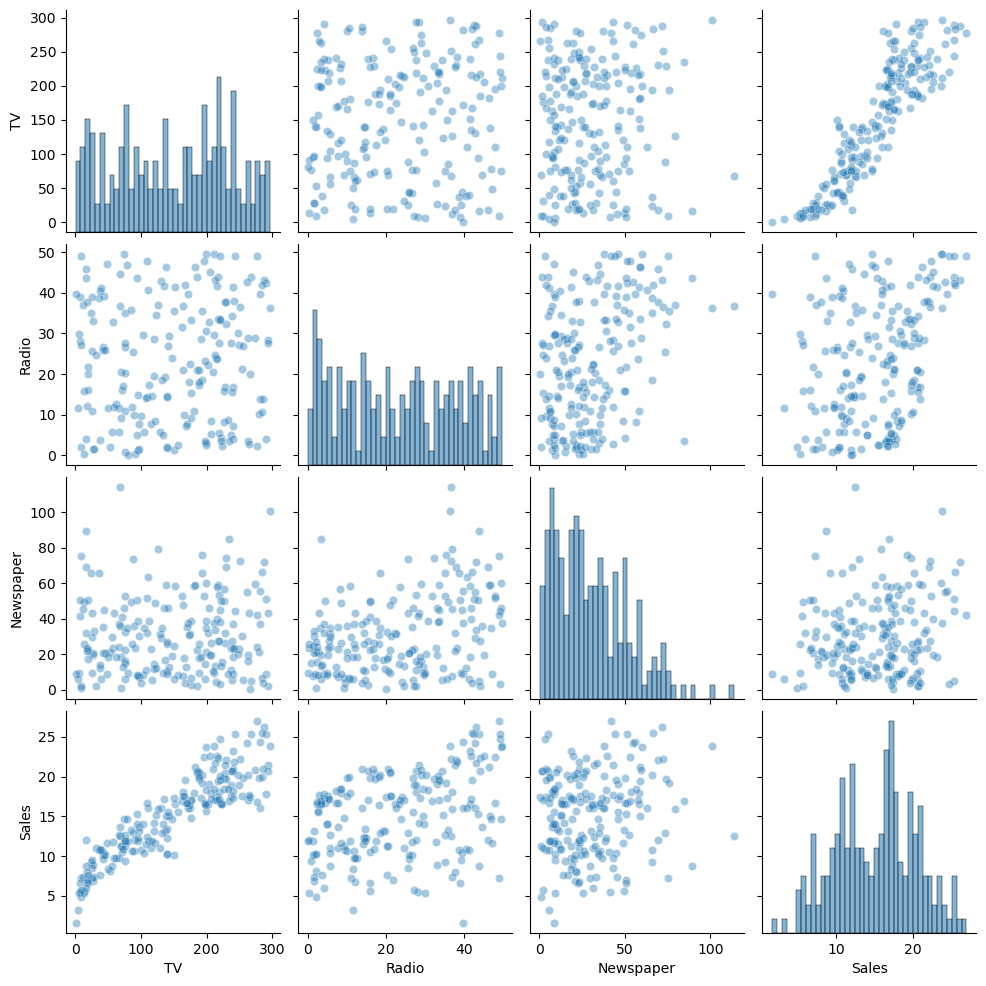

In [17]:
sns.pairplot(data,
            kind='scatter',
            plot_kws={'alpha':0.4},
            diag_kws={'alpha':0.55,'bins':40})

C:\Users\Wajiz.pk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


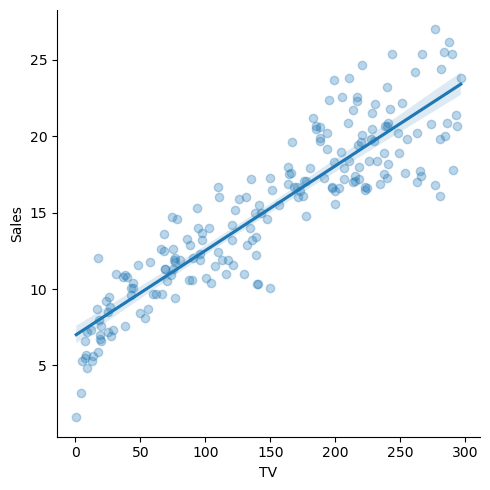

In [19]:
# TV vs sales
sns.lmplot(x='TV',
           y='Sales',
           data=data,
           scatter_kws={'alpha':0.3})

# Splitting data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data[['TV','Radio','Newspaper']]

In [22]:
y = data['Sales']

In [24]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Traning the model with multivariable regression using sickit learn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
# the coefficients
lm.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [32]:
lm.intercept_

4.743766701589687

# Prediction on Training Data: Training Accuracy

In [34]:
#Predicting the training set
y_train_pred = lm.predict(X_train)

In [35]:
pd.DataFrame({'Original_Sales':y_train, 'Predicted_Sales':y_train_pred})

,Original_Sales,Predicted_Sales
169,20.0,21.118486
97,20.5,16.983655
31,11.9,12.887190
12,9.2,10.146882
35,17.8,20.810516
...,...,...
106,7.2,7.448829
14,19.0,19.425128
92,19.4,20.318670
179,17.6,14.784719


In [38]:
print('Coefficient:',lm.coef_)
print('Intercept:', lm.intercept_)

Coefficient: [0.05358869 0.10270677 0.00793167]
Intercept: 4.743766701589687


In [40]:
print('Variance score: %.2f' % lm.score(X_train,y_train))

Variance score: 0.89


# Prediction on Testing Data: Testing Accuracy

In [42]:
y_test_pred = lm.predict(X_test)

In [43]:
pd.DataFrame({'Original Weight': y_test, "Predicted Weight": y_test_pred})

,Original Weight,Predicted Weight
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368
115,12.6,12.781013
69,22.3,21.086363
170,8.4,8.760542
174,16.5,17.115000
45,16.1,16.687896


In [45]:
#Mean square error
print("Mean squared error: %2f" % np.mean((lm.predict(X_test) - y_test)**2))
# Explained variance score: 1 is prefect prediction
print("Variance score: %2f" % lm.score(X_test, y_test))

Mean squared error: 2.541624
Variance score: 0.909148


In [46]:
def predictSales(tv, radio, newspaper):
    return lm.predict([[tv, radio, newspaper]])

In [47]:
tv = float(input("Enter TV Advertising Budget ($): "))
radio = float(input("Enter Radio Advertising Budget ($): "))
newspaper = float(input("Enter Newspaper Advertising Budget ($): "))

Enter TV Advertising Budget ($): 20
Enter Radio Advertising Budget ($): 30
Enter Newspaper Advertising Budget ($): 50


In [53]:
Sales = predictSales(tv, radio, newspaper)
print("Predicted Sales:", Sales)

Predicted Sales: [9.29332695]


C:\Users\Wajiz.pk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
